# Tendência das Vendas

## Alucar - Analisando as Vendas

### Analisando a base de dados

In [13]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [4]:
dados_alucar = pd.read_csv('alucar.csv')
dados_alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [5]:
dados_alucar.describe()

,vendas
count,24.000000
mean,287.875000
std,222.151204
min,10.000000
25%,96.000000
50%,245.500000
75%,450.750000
max,721.000000


In [7]:
dados_alucar.shape

(24, 2)

In [8]:
dados_alucar.isna().sum()

mes       0
vendas    0
dtype: int64

In [10]:
dados_alucar.dtypes

mes       object
vendas     int64
dtype: object

**Convertendo o campo "mes" do tipo object do Pandas para o tipo DATETIME**

In [11]:
dados_alucar['mes'] = pd.to_datetime(dados_alucar['mes'])
dados_alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [12]:
dados_alucar

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63
5,2017-06-30,81
6,2017-07-31,101
7,2017-08-31,124
8,2017-09-30,148
9,2017-10-31,174


### Analise Visual

<Axes: xlabel='mes', ylabel='vendas'>

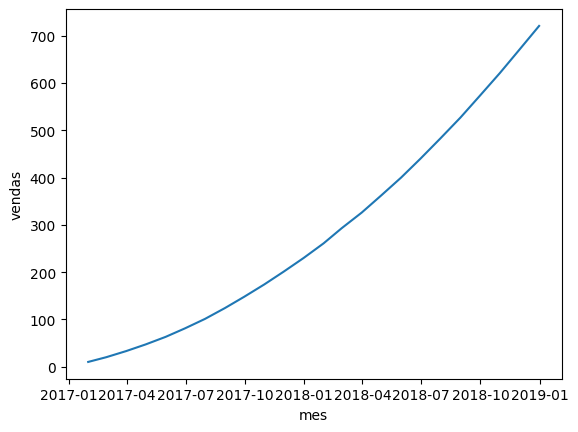

In [15]:
sns.lineplot(
    x= 'mes',
    y= 'vendas',
    data= dados_alucar
)